<a href="https://colab.research.google.com/github/demilade27/Predicting-Monthly-Excess-Returns-of-Market-Index/blob/main/Predicting_Monthly_Excess_Returns_of_Market_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-requisite




## Import Libraries


In [1]:
# Comment out the pip requirement 
# !pip install -r requirements.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Final
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_ccf
from statsmodels.tsa.stattools import acf, pacf
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Load The Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/demilade27/Predicting-Monthly-Excess-Returns-of-Market-Index/d2f2cb8478612fa4e8fd4e87628375d44f6cb72e/data.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
DF_FINAL: Final = df 

# Analyse the dataset

## Generate descriptive statistics

In [3]:
df.describe()

,dfy,infl,svar,de,lty,tms,tbl,dfr,dp,dy,ltr,ep,b/m,ntis,mr,R
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,0.011160,0.002473,0.002916,-0.647478,0.049656,0.016725,0.032931,0.000452,-3.408696,-3.403723,0.004489,-2.761218,0.552159,0.015991,0.009476,0.006740
std,0.006781,0.005266,0.005998,0.327729,0.028082,0.012924,0.030649,0.014086,0.476560,0.474459,0.024952,0.420533,0.268291,0.025712,0.054315,0.054449
min,0.003200,-0.020548,0.000072,-1.244209,0.006200,-0.036500,0.000100,-0.097600,-4.523640,-4.530894,-0.112400,-4.836478,0.120510,-0.055954,-0.287461,-0.287761
25%,0.007000,0.000000,0.000695,-0.869874,0.027400,0.008200,0.003800,-0.005100,-3.846171,-3.837780,-0.007625,-2.986049,0.323772,0.003618,-0.016829,-0.019785
50%,0.009000,0.002422,0.001269,-0.636276,0.041000,0.017050,0.027750,0.000600,-3.374832,-3.366197,0.003000,-2.810399,0.529101,0.015954,0.012951,0.010006
75%,0.013025,0.005098,0.002491,-0.501965,0.067325,0.025700,0.050700,0.005900,-3.043790,-3.039180,0.016100,-2.481701,0.738709,0.027028,0.038927,0.035815
max,0.056400,0.058824,0.073153,1.379530,0.148200,0.045500,0.163000,0.073700,-1.873246,-1.912904,0.152300,-1.774952,2.028478,0.177040,0.414312,0.413312


## Check for null or zero values
*Analysis*
---
There are no null values in the dataset
Analysing the dataset values there are zero values
* INFL: There are 239 zero values showing signs of Deflationary Stagnation
* DE:
* LTR:
* TMS:
* DFR:

In [4]:
print(df.isnull().sum())
print(df.duplicated().sum())
print((df == 0).sum())

dfy     0
infl    0
svar    0
de      0
lty     0
tms     0
tbl     0
dfr     0
dp      0
dy      0
ltr     0
ep      0
b/m     0
ntis    0
mr      0
R       0
dtype: int64
0
dfy       0
infl    239
svar      0
de        1
lty       0
tms       1
tbl       0
dfr       9
dp        0
dy        0
ltr       4
ep        0
b/m       0
ntis      0
mr        0
R         0
dtype: int64


## Analyse Data Skewness

In [5]:
df.skew()

dfy     2.554524
infl    1.056650
svar    6.219337
de      1.511733
lty     1.095245
tms    -0.211256
tbl     1.134915
dfr    -0.597824
dp     -0.148801
dy     -0.173086
ltr     0.508250
ep     -0.491433
b/m     0.806526
ntis    1.635125
mr      0.329734
R       0.366232
dtype: float64


## Data Visualization


### Correlation analysis

#### Correlation analysis of dataset

Text(0.5, 1.0, 'Correlation Heatmap')

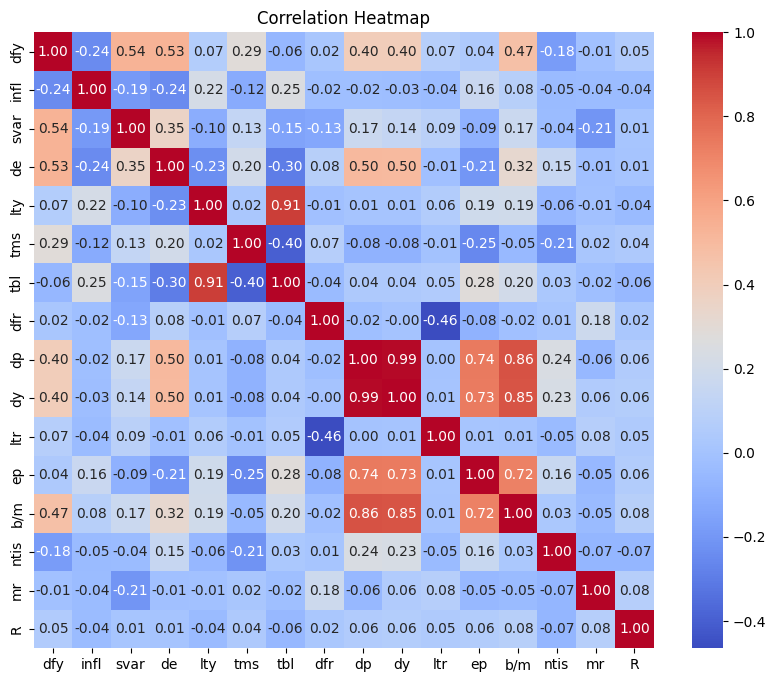

In [6]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.title('Correlation Heatmap')

#### Correlation analysis with R

Text(0.5, 1.0, 'Correlation Heatmap with R')

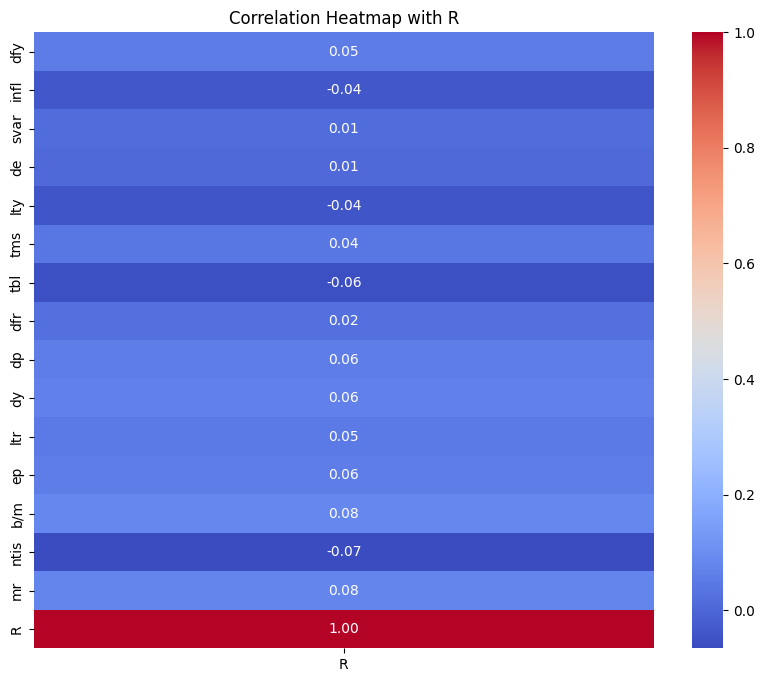

In [7]:
target_correlation = correlation_matrix[['R']]
plt.figure(figsize=(10,8))
sns.heatmap(target_correlation,annot=True,fmt=".2f",cmap="coolwarm")
plt.title('Correlation Heatmap with R')

### Residual plot


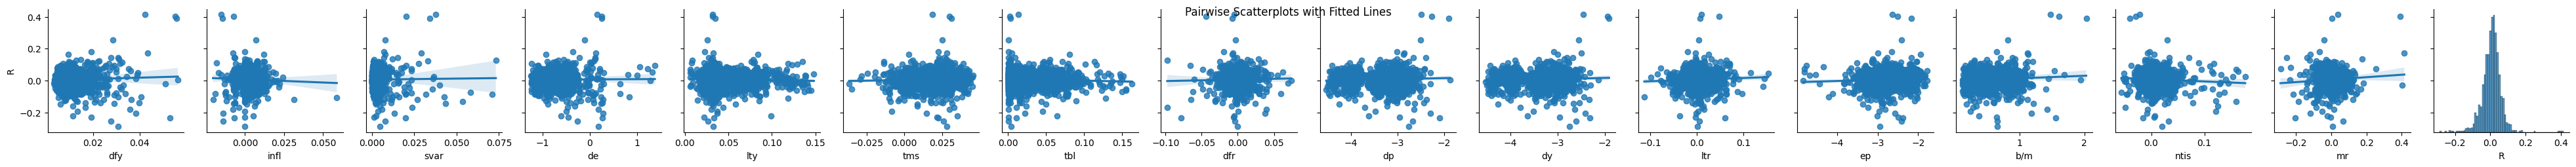

In [8]:
sns.pairplot(df,y_vars=['R'],x_vars=df.select_dtypes(include='number').columns,kind='reg')
plt.suptitle("Pairwise Scatterplots with Fitted Lines")
plt.show()

### Box Plot
This is the analysis of the skewness of the data

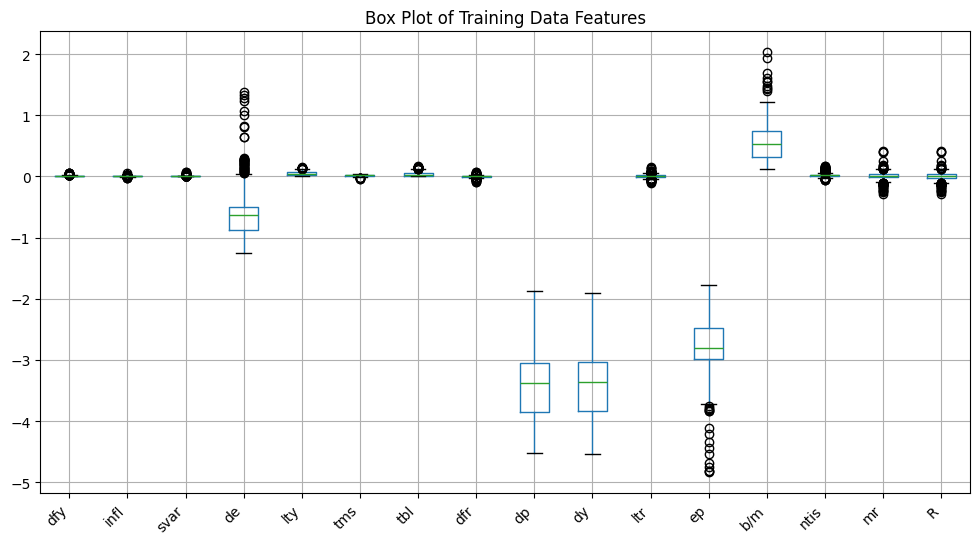

In [9]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Box Plot of Training Data Features')
plt.xticks(rotation=45, ha='right')
plt.show()

### Autocorrelation and Partial Autocorrelation Analysis

#### 12 Month lag

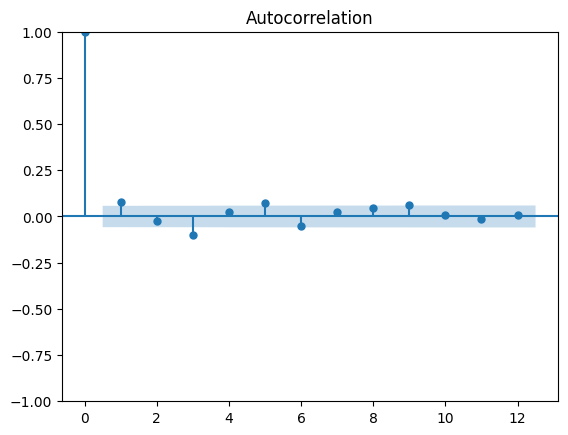

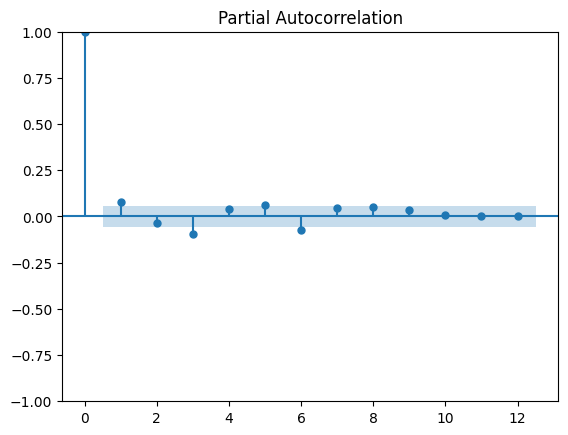

In [10]:
plot_acf(df['mr'],lags=12)
plot_pacf(df['mr'],lags=12)
plt.show()

#### 24 Month lag

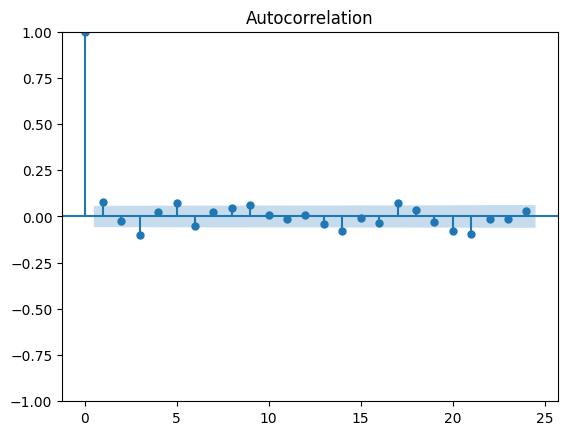

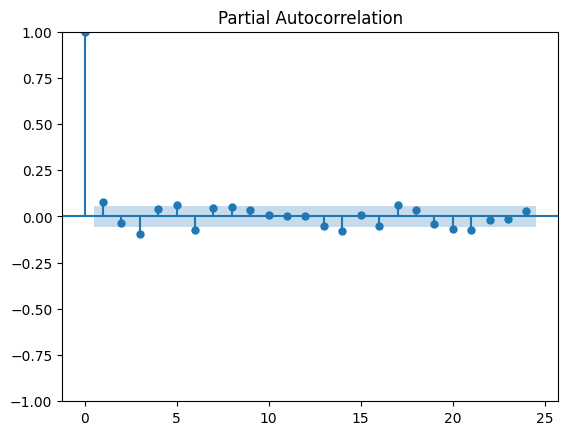

In [11]:
plot_acf(df['mr'],lags=24)
plot_pacf(df['mr'],lags=24)
plt.show()

# Pre-processing

## Data Spliting

In [12]:
split_date='2019-01-01'
train_data=df[df.index <split_date]
x_train=train_data.drop('R',axis=1)
y_train=train_data[['R']]
test_data=df[df.index >=split_date]
x_test=test_data.drop('R',axis=1)
y_test=test_data[['R']]
x_train.shape
x_test.shape

(48, 15)

## Feature Engineering

### Create a new feature for B/M and DP

In [13]:

# 2. Perform feature engineering on the training set
x_train['dp_dy_ratio'] = (x_train['dp'] * x_train['dy'])
x_train = x_train.drop('dp', axis=1)
x_train = x_train.drop('dy', axis=1)

# 3. Apply the same feature engineering to the testing set
x_test['dp_dy_ratio'] = (x_test['dp'] * x_test['dy'])
x_test = x_test.drop('dp', axis=1)
x_test = x_test.drop('dy', axis=1)

#### Analyse New Features 

### Moving Averages and Rolling Volitility 

#### Moving average for default yield spread

In [14]:
x_train['dfy_ma3'] = x_train['dfy'].rolling(window=3).mean()

x_test['dfy_ma3'] = x_test['dfy'].rolling(window=3).mean()



#### Moving average and rolling volatility for stock variance

In [15]:
x_train['svar_ma3'] = x_train['svar'].rolling(window=3).mean()

x_test['svar_ma3'] = x_test['svar'].rolling(window=3).mean()


#### Rolling volatility for inflation

In [16]:
x_train['infl_rolling_std'] = df['infl'].rolling(window=6).std()
x_test['infl_rolling_std'] = df['infl'].rolling(window=6).std()

#### Re-analyse data moving average and roling volitility 

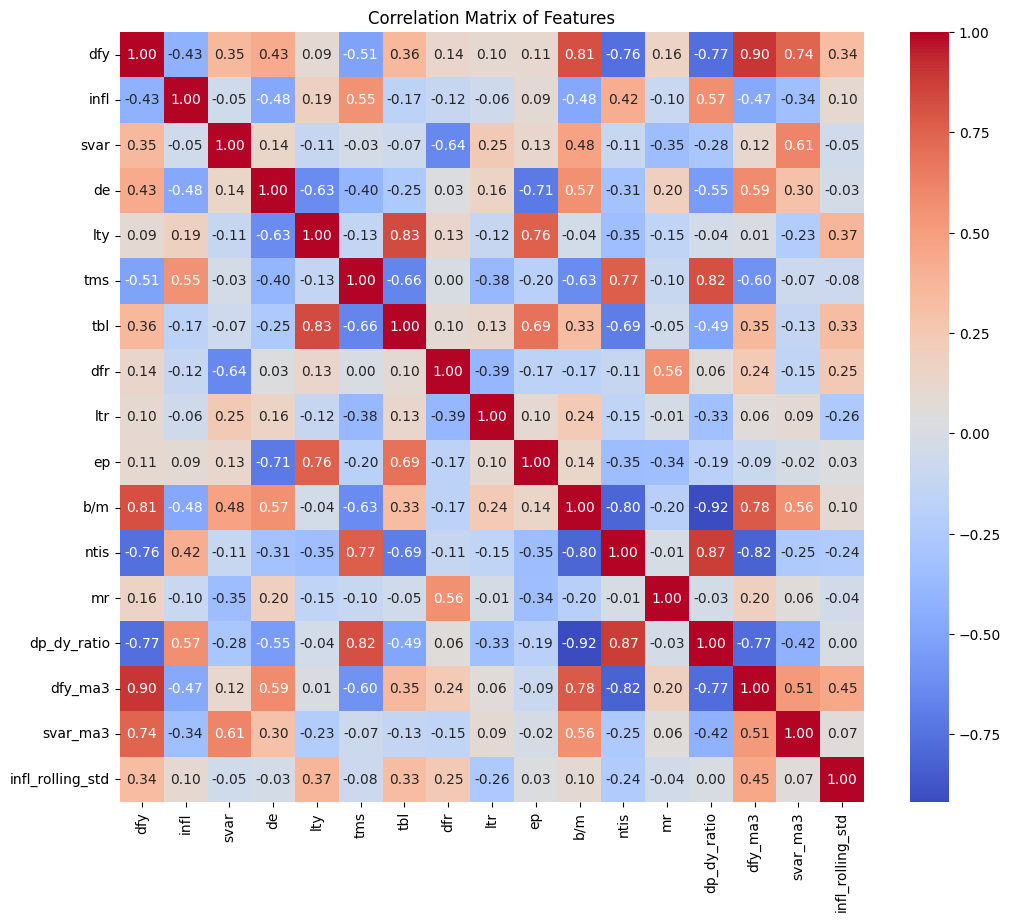

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(x_test.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

### Lagging 

#### Lag Market Returns 

In [18]:

lags_mr = list(range(1, 4,1)) + list(range(6, 13, 6))
# Apply lags for 'mr'
for lag in lags_mr:
    x_train[f'mr_lag{lag}'] = x_train['mr'].shift(lag)
    x_test[f'mr_lag{lag}'] = x_test['mr'].shift(lag)

# Handle missing values
x_train = x_train.fillna(method='bfill')
x_test = x_test.fillna(method='bfill')
x_train.dropna(inplace=True)

x_test.dropna(inplace=True)

/var/folders/vw/trk5pzwn1qg69p8f6mv4gpf00000gn/T/ipykernel_22869/3630107074.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_train = x_train.fillna(method='bfill')
/var/folders/vw/trk5pzwn1qg69p8f6mv4gpf00000gn/T/ipykernel_22869/3630107074.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_test = x_test.fillna(method='bfill')


#### Lag Fundamental fators 

In [19]:
lags_tms_dfy = list(range(1, 7, 2) ) # Monthly lags up to 12 months
for lag in lags_tms_dfy:
    x_train[f'tms_lag{lag}'] = x_train['tms'].shift(lag)
    x_test[f'tms_lag{lag}'] = x_test['tms'].shift(lag)
    x_train[f'ntis_lag{lag}'] = x_train['ntis'].shift(lag)
    x_test[f'ntis_lag{lag}'] = x_test['ntis'].shift(lag)
    x_train[f'dfy_ma3_lag{lag}'] = x_train['dfy_ma3'].shift(lag)
    x_test[f'dfy_ma3_lag{lag}'] = x_test['dfy_ma3'].shift(lag)

# Handle missing values
x_train = x_train.fillna(method='bfill')
x_test = x_test.fillna(method='bfill')
x_train.dropna(inplace=True)

x_test.dropna(inplace=True)


/var/folders/vw/trk5pzwn1qg69p8f6mv4gpf00000gn/T/ipykernel_22869/1686787428.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_train = x_train.fillna(method='bfill')
/var/folders/vw/trk5pzwn1qg69p8f6mv4gpf00000gn/T/ipykernel_22869/1686787428.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_test = x_test.fillna(method='bfill')


#### Lag Economic Factors

In [20]:
lags_infl_ltr_bm = list(range(1, 7,2))  # Monthly lags for slower-moving variables
# Apply lags for 'infl', 'ltr', and 'b/m'
for lag in lags_infl_ltr_bm:
    x_train[f'infl_lag{lag}'] = x_train['infl'].shift(lag)
    x_test[f'infl_lag{lag}'] = x_test['infl'].shift(lag)
    x_train[f'ltr_lag{lag}'] = x_train['ltr'].shift(lag)
    x_test[f'ltr_lag{lag}'] = x_test['ltr'].shift(lag)
    x_train[f'b/m{1}'] = x_train['b/m'].shift(1)
    x_test[f'b/m{1}'] = x_test['b/m'].shift(1)
# Handle missing values
x_train = x_train.fillna(method='bfill')
x_test = x_test.fillna(method='bfill')
x_train.dropna(inplace=True)

x_test.dropna(inplace=True)

 

/var/folders/vw/trk5pzwn1qg69p8f6mv4gpf00000gn/T/ipykernel_22869/1987688186.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_train = x_train.fillna(method='bfill')
/var/folders/vw/trk5pzwn1qg69p8f6mv4gpf00000gn/T/ipykernel_22869/1987688186.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_test = x_test.fillna(method='bfill')


In [21]:
# x_train['interaction_1'] = x_train['dfy_ma3_lag3'] * x_train['dp_dy_ratio']
# x_train['rolling_mean_mr'] = x_train['mr'].rolling(window=3).mean()
# x_train['volatility_normalized_dfy'] = x_train['dfy'] / x_train['svar']

# x_test['interaction_1'] = x_test['dfy_ma3_lag3'] * x_test['dp_dy_ratio'] 
# x_test['rolling_mean_mr'] = x_test['mr'].rolling(window=3).mean()
# x_test['volatility_normalized_dfy'] = x_test['dfy'] / x_test['svar']


In [22]:
x_train.describe()
x_test.describe()

,dfy,infl,svar,de,lty,tms,tbl,dfr,ltr,ep,...,tms_lag5,ntis_lag5,dfy_ma3_lag5,infl_lag1,ltr_lag1,b/m1,infl_lag3,ltr_lag3,infl_lag5,ltr_lag5
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.009487,0.003435,0.004459,-0.874242,0.018419,0.007581,0.010837,0.003232,0.000030,-3.218258,...,0.007794,-0.004589,0.009542,0.003281,0.000474,0.225035,0.003104,0.004370,0.002681,0.006689
std,0.002280,0.004228,0.010481,0.219717,0.008750,0.006556,0.011593,0.021405,0.035002,0.196118,...,0.006347,0.013296,0.002156,0.004339,0.035481,0.029443,0.004512,0.034759,0.004395,0.035033
min,0.006500,-0.006687,0.000306,-1.186669,0.006200,-0.003200,0.000200,-0.097600,-0.077321,-3.686452,...,-0.003200,-0.023231,0.006533,-0.006687,-0.077321,0.175599,-0.006687,-0.077321,-0.006687,-0.077321
25%,0.007200,0.000361,0.001097,-1.062643,0.012750,0.002675,0.000875,-0.004400,-0.020627,-3.348988,...,0.003125,-0.015436,0.007417,0.000154,-0.020627,0.203358,0.000002,-0.019383,-0.000172,-0.017445
50%,0.009350,0.002907,0.002275,-0.887509,0.016700,0.005700,0.003850,0.004600,-0.004350,-3.138694,...,0.005600,-0.007446,0.009733,0.002728,-0.004350,0.226352,0.002728,0.001200,0.002501,0.002350
75%,0.010925,0.005501,0.004754,-0.731371,0.025400,0.014275,0.021175,0.016661,0.024545,-3.078687,...,0.014275,0.007382,0.011433,0.005501,0.024591,0.244962,0.005501,0.028475,0.005473,0.034050
max,0.017000,0.013736,0.073153,-0.479438,0.039800,0.019900,0.041500,0.041600,0.079700,-2.941030,...,0.019900,0.020054,0.014733,0.013736,0.079700,0.302152,0.013736,0.079700,0.013351,0.079700


#### Analyse

### Dropping columns

#### Drop Book to market ratio

In [23]:
x_train = x_train.drop('b/m', axis=1) 
x_test = x_test.drop('b/m', axis=1)

#### Drop long term yield 
Dropping LTY and TBL because the relationship is covered in term spread 

In [24]:
x_train = x_train.drop('lty', axis=1) 
x_test = x_test.drop('lty', axis=1)

In [25]:
x_test.describe()

,dfy,infl,svar,de,tms,tbl,dfr,ltr,ep,ntis,...,tms_lag5,ntis_lag5,dfy_ma3_lag5,infl_lag1,ltr_lag1,b/m1,infl_lag3,ltr_lag3,infl_lag5,ltr_lag5
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.009487,0.003435,0.004459,-0.874242,0.007581,0.010837,0.003232,0.000030,-3.218258,-0.003824,...,0.007794,-0.004589,0.009542,0.003281,0.000474,0.225035,0.003104,0.004370,0.002681,0.006689
std,0.002280,0.004228,0.010481,0.219717,0.006556,0.011593,0.021405,0.035002,0.196118,0.012676,...,0.006347,0.013296,0.002156,0.004339,0.035481,0.029443,0.004512,0.034759,0.004395,0.035033
min,0.006500,-0.006687,0.000306,-1.186669,-0.003200,0.000200,-0.097600,-0.077321,-3.686452,-0.023231,...,-0.003200,-0.023231,0.006533,-0.006687,-0.077321,0.175599,-0.006687,-0.077321,-0.006687,-0.077321
25%,0.007200,0.000361,0.001097,-1.062643,0.002675,0.000875,-0.004400,-0.020627,-3.348988,-0.012555,...,0.003125,-0.015436,0.007417,0.000154,-0.020627,0.203358,0.000002,-0.019383,-0.000172,-0.017445
50%,0.009350,0.002907,0.002275,-0.887509,0.005700,0.003850,0.004600,-0.004350,-3.138694,-0.006660,...,0.005600,-0.007446,0.009733,0.002728,-0.004350,0.226352,0.002728,0.001200,0.002501,0.002350
75%,0.010925,0.005501,0.004754,-0.731371,0.014275,0.021175,0.016661,0.024545,-3.078687,0.007382,...,0.014275,0.007382,0.011433,0.005501,0.024591,0.244962,0.005501,0.028475,0.005473,0.034050
max,0.017000,0.013736,0.073153,-0.479438,0.019900,0.041500,0.041600,0.079700,-2.941030,0.020054,...,0.019900,0.020054,0.014733,0.013736,0.079700,0.302152,0.013736,0.079700,0.013351,0.079700


## Data Transformation
The evaluation of the data revealed a high standard deviation in certain features. To mitigate the potential impact of this variability and ensure features contribute equally to model training, data standardization was applied. This process transforms the data to have zero mean and unit variance, effectively balancing the dataset.

### Data Scaling

In [26]:
scaler_x = StandardScaler()
columns = x_train.columns

x_train[columns] = scaler_x.fit_transform(x_train[columns])  # Fit on x_train, transform x_train
x_test[columns] = scaler_x.transform(x_test[columns])        # Transform x_test using the same scaler

### Analyse Transformation

In [27]:
x_test.describe()

,dfy,infl,svar,de,tms,tbl,dfr,ltr,ep,ntis,...,tms_lag5,ntis_lag5,dfy_ma3_lag5,infl_lag1,ltr_lag1,b/m1,infl_lag3,ltr_lag3,infl_lag5,ltr_lag5
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,-0.252980,0.189464,0.281425,-0.721389,-0.734988,-0.747376,0.212139,-0.190584,-1.145740,-0.802045,...,-0.715534,-0.845247,-0.248489,0.159669,-0.171077,-1.290714,0.124614,-0.014535,0.043147,0.080412
std,0.330437,0.797525,1.832145,0.669847,0.505045,0.375826,1.565322,1.433708,0.471156,0.491684,...,0.488167,0.516306,0.316491,0.818238,1.455631,0.111253,0.850628,1.430150,0.828491,1.441858
min,-0.686017,-1.719732,-0.444442,-1.673879,-1.565469,-1.092232,-7.161510,-3.358889,-2.270535,-1.554847,...,-1.561155,-1.569124,-0.690013,-1.720121,-3.362652,-1.477515,-1.721329,-3.375707,-1.722583,-3.377269
25%,-0.584552,-0.390405,-0.306319,-1.295762,-1.112917,-1.070349,-0.345979,-1.036697,-1.459808,-1.140703,...,-1.074647,-1.266440,-0.560369,-0.430000,-1.036761,-1.372624,-0.460247,-0.991851,-0.494597,-0.912925
50%,-0.272910,0.089723,-0.100240,-0.761836,-0.879901,-0.973903,0.312173,-0.369978,-0.954593,-0.912039,...,-0.884274,-0.956185,-0.220359,0.055420,-0.368981,-1.285738,0.053759,-0.144973,0.009262,-0.098190
75%,-0.044614,0.579144,0.333088,-0.285820,-0.219367,-0.412246,1.194178,0.813547,-0.810432,-0.367360,...,-0.217007,-0.380392,0.029145,0.578381,0.818355,-1.215416,0.576586,0.977251,0.569368,1.206508
max,0.835956,2.132302,12.289769,0.482245,0.213928,0.246668,3.017910,3.072726,-0.479723,0.124190,...,0.215658,0.111674,0.513476,2.131286,3.079207,-0.999316,2.129095,3.084893,2.054429,3.085357


# Models

## Linear Regression

### OLS

#### Training

In [28]:
ols = LinearRegression()
ols = ols.fit(x_train, y_train)
y_insample_pred_ols = ols.predict(x_train)
y_outsample_pred_ols = ols.predict(x_test)

#### Analysing OLS Coeeficient 

In [29]:
# Assuming 'ols' is the fitted Linear Regression model from your code
# Access coefficients
coefficients = ols.coef_

# Access feature names
feature_names = x_train.columns

# Create a DataFrame for coefficients and their importance
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Sort by absolute value of coefficients (importance)
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)
coefficients_df = coefficients_df.drop(columns=['Abs_Coefficient'])

# Display the coefficients and their importance
coefficients_df

,Feature,Coefficient
25,dfy_ma3_lag3,-0.039831
22,dfy_ma3_lag1,0.028152
27,ntis_lag5,-0.023877
11,dp_dy_ratio,0.020912
0,dfy,-0.019008
12,dfy_ma3,0.018930
8,ep,0.018345
24,ntis_lag3,0.017591
21,ntis_lag1,0.012290
3,de,0.011532


### Ridge

#### Time serires Cross validation

In [30]:
tscv = TimeSeriesSplit(n_splits=5, test_size=12 )

####  Alpha Cross Validation

In [31]:
alphas = np.logspace(-4, 4, 100)
ridge_cv = RidgeCV(alphas=alphas, cv=tscv, scoring='neg_mean_squared_error')
ridge_cv.fit(x_train, y_train)

RidgeCV(alphas=array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-0...
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
        cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=12),
        scoring='neg_mean_squared_error')

#### Training

In [32]:
ridge = Ridge(alpha=ridge_cv.alpha_,max_iter=1000,fit_intercept=False)
ridge.fit(x_train, y_train)
y_insample_pred_ridge = ridge.predict(x_train)
y_outsample_pred_ridge = ridge.predict(x_test)

### Lasso

#### Time serires Cross validation

In [33]:
tscv = TimeSeriesSplit(n_splits=5, test_size=12)

#### Alpha Cross Validation

In [34]:
alphas = np.logspace(-4, 4, 100) 
lasso_cv = LassoCV(alphas=alphas, cv=tscv)
lasso_cv.fit(x_train, y_train)

/opt/anaconda3/envs/Qmul/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-0...
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
        cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=12))

#### Analysing the coefficent

In [35]:
# @ Analysing the coefficent
coefficients = lasso_cv.coef_

feature_names = x_train.columns
dropped_features = feature_names[np.where(coefficients ==0)]
print(dropped_features)
import numpy as np

importance = np.abs(coefficients)
sorted_indices = np.argsort(importance)[::-1]  # Indices sorted by importance

# If you have feature names (e.g., from a pandas DataFrame):
for i in sorted_indices:
    print(f"{feature_names[i]}: {importance[i]}")

Index(['dfy', 'infl', 'svar', 'de', 'tms', 'tbl', 'dfr', 'ltr', 'ep', 'ntis',
       'mr', 'dp_dy_ratio', 'dfy_ma3', 'svar_ma3', 'infl_rolling_std',
       'mr_lag1', 'mr_lag2', 'mr_lag3', 'mr_lag6', 'mr_lag12', 'tms_lag1',
       'ntis_lag1', 'dfy_ma3_lag1', 'tms_lag3', 'ntis_lag3', 'dfy_ma3_lag3',
       'tms_lag5', 'ntis_lag5', 'dfy_ma3_lag5', 'infl_lag1', 'ltr_lag1',
       'b/m1', 'infl_lag3', 'ltr_lag3', 'infl_lag5', 'ltr_lag5'],
      dtype='object')
ltr_lag5: 0.0
infl_lag5: 0.0
mr_lag1: 0.0
infl_rolling_std: 0.0
svar_ma3: 0.0
dfy_ma3: 0.0
dp_dy_ratio: 0.0
mr: 0.0
ntis: 0.0
ep: 0.0
ltr: 0.0
dfr: 0.0
tbl: 0.0
tms: 0.0
de: 0.0
svar: 0.0
infl: 0.0
mr_lag2: 0.0
mr_lag3: 0.0
mr_lag6: 0.0
ntis_lag5: 0.0
ltr_lag3: 0.0
infl_lag3: 0.0
b/m1: 0.0
ltr_lag1: 0.0
infl_lag1: 0.0
dfy_ma3_lag5: 0.0
tms_lag5: 0.0
mr_lag12: 0.0
dfy_ma3_lag3: 0.0
ntis_lag3: 0.0
tms_lag3: 0.0
dfy_ma3_lag1: 0.0
ntis_lag1: 0.0
tms_lag1: 0.0
dfy: 0.0


#### Training

In [36]:
lasso = Lasso(alpha=lasso_cv.alpha_,max_iter=1000,fit_intercept=False)
lasso.fit(x_train, y_train)
y_insample_pred_lasso = lasso.predict(x_train)
y_outsample_pred_lasso = lasso.predict(x_test)

## Random Forest

In [37]:

# Implement Random Forest with optimized hyperparameter tuning
rf = RandomForestRegressor(random_state=42, n_jobs=- 4)  # Use all CPU cores

rf_params = {
    "n_estimators": [50, 100, 200, 300],  # Fewer estimators for faster training
    "max_depth": [None, 10, 20, 30],     # Balanced depth options
    "min_samples_split": [2, 5, 10, 15], # Tuning sample split criteria
}

# Use fewer CV folds if speed is critical
rf_random = RandomizedSearchCV(
    rf, rf_params, cv=TimeSeriesSplit(n_splits=4, test_size=12), scoring="neg_mean_squared_error"
)


# Ensure y_train is a 1D array
y_train_1d = y_train.to_numpy().ravel()

# Fit the model
rf_random.fit(x_train, y_train_1d)

print("Best Random Forest Params:", rf_random.best_params_)

# Predict and evaluate Random Forest
y_train_pred_rf = rf_random.best_estimator_.predict(x_train)
y_test_pred_rf = rf_random.best_estimator_.predict(x_test)

Best Random Forest Params: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 10}


# Performance Test

## Performance Metrics

### Define a function to calculate the performance metrics

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

def timing_strategy_evaluation_with_drawdown(trained_model, X_test, actual_returns, risk_free_rate=0.02 / 12, threshold=0, initial_value=100):
    """
    Evaluate a timing strategy based on a trained model's predictions.

    Parameters:
        trained_model: Trained machine learning model with a `predict` method.
        X_test: DataFrame or array of predictors for testing (features for prediction).
        actual_returns: Series or array of actual returns for the evaluation period.
        risk_free_rate: Monthly risk-free rate, default is 0.02 annualized.
        threshold: Threshold for deciding risk-on or risk-off, default is 0.
        initial_value: Initial portfolio value, default is 100.

    Returns:
        portfolio_values: Series of portfolio values over time.
        cumulative_return: Final cumulative return of the portfolio.
        sharpe_ratio: Sharpe ratio of the portfolio strategy.
        max_drawdown: Maximum drawdown of the portfolio.
    """
    # Predict returns using the trained model
    predicted_returns = trained_model.predict(X_test)
    
    # Ensure actual_returns is a NumPy array for consistency
    if isinstance(actual_returns, pd.Series) or isinstance(actual_returns, pd.DataFrame):
        actual_returns = actual_returns.values.flatten()
    elif not isinstance(actual_returns, (list, tuple)):
        raise TypeError("actual_returns must be a Series, DataFrame, list, or tuple.")

    # Initialize portfolio for timing strategy
    portfolio_values_timing = [initial_value]

    # Timing strategy
    for i in range(len(predicted_returns)):
        if predicted_returns[i] > threshold:  # Risk-On
            portfolio_values_timing.append(portfolio_values_timing[-1] * (1 + actual_returns[i]))
        else:  # Risk-Off
            portfolio_values_timing.append(portfolio_values_timing[-1] * (1 + risk_free_rate))

    # Convert portfolio values to pandas Series for analysis
    portfolio_values_timing = pd.Series(portfolio_values_timing)

    # Calculate performance metrics for timing strategy
    cumulative_return_timing = portfolio_values_timing.iloc[-1] / portfolio_values_timing.iloc[0] - 1
    sharpe_ratio_timing = (portfolio_values_timing.pct_change().mean() - risk_free_rate) / portfolio_values_timing.pct_change().std()

    # Calculate maximum drawdown for timing strategy
    rolling_max_timing = portfolio_values_timing.cummax()
    drawdown_timing = (portfolio_values_timing - rolling_max_timing) / rolling_max_timing
    max_drawdown_timing = drawdown_timing.min()

    # Buy-and-hold strategy
    portfolio_values_bh = [initial_value]
    for ret in actual_returns:
        portfolio_values_bh.append(portfolio_values_bh[-1] * (1 + ret))
    portfolio_values_bh = pd.Series(portfolio_values_bh)

    # Plot portfolio evolution
    plt.figure(figsize=(10, 6))
    plt.plot(portfolio_values_timing, label="Timing Strategy", marker='o', linestyle='-')
    plt.plot(portfolio_values_bh, label="Buy-and-Hold Strategy", marker='x', linestyle='--')
    plt.title("Portfolio Evolution: Timing Strategy vs Buy-and-Hold")
    plt.xlabel("Time (Months)")
    plt.ylabel("Portfolio Value")
    plt.legend()
    plt.grid()
    plt.show()

    return portfolio_values_timing, cumulative_return_timing, sharpe_ratio_timing, max_drawdown_timing



### Linear Regression 

#### In-sample Performance Comparism

In [39]:
mse_insample_ols = mean_squared_error(y_train, y_insample_pred_ols)
r2_insample_ols = r2_score(y_train, y_insample_pred_ols)
mse_insample_ridge = mean_squared_error(y_train, y_insample_pred_ridge)
r2_insample_ridge = r2_score(y_train, y_insample_pred_ridge)
mse_insample_lasso = mean_squared_error(y_train, y_insample_pred_lasso)
r2_insample_lasso = r2_score(y_train, y_insample_pred_lasso)
print('Model Insample Performance Comparison:')
print(f'OLS MSE: {mse_insample_ols:.4f}, R-squared: {r2_insample_ols:.4f}')
print(f'Ridge MSE: {mse_insample_ridge:.4f}, R-squared: {r2_insample_ridge:.4f}')
print(f'Lasso MSE: {mse_insample_lasso:.4f}, R-squared: {r2_insample_lasso:.4f}')


Model Insample Performance Comparison:
OLS MSE: 0.0027, R-squared: 0.0860
Ridge MSE: 0.0027, R-squared: 0.0715
Lasso MSE: 0.0030, R-squared: -0.0145


#### out-sample Performance Comparism

In [40]:
mse_outsample_ols = mean_squared_error(y_test, y_outsample_pred_ols)
r2_outsample_ols = r2_score(y_test, y_outsample_pred_ols)
mse_outsample_ridge = mean_squared_error(y_test, y_outsample_pred_ridge)
r2_outsample_ridge = r2_score(y_test, y_outsample_pred_ridge)
mse_outsample_lasso = mean_squared_error(y_test, y_outsample_pred_lasso)
r2_outsample_lasso = r2_score(y_test, y_outsample_pred_lasso)
print('Model Outsample Performance Comparison:')
print(f'OLS MSE: {mse_outsample_ols:.4f}, R-squared: {r2_outsample_ols:.4f}')
print(f'Ridge MSE: {mse_outsample_ridge:.4f}, R-squared: {r2_outsample_ridge:.4f}')
print(f'Lasso MSE: {mse_outsample_lasso:.4f}, R-squared: {r2_outsample_lasso:.4f}')

Model Outsample Performance Comparison:
OLS MSE: 0.0032, R-squared: -0.0437
Ridge MSE: 0.0034, R-squared: -0.0868
Lasso MSE: 0.0032, R-squared: -0.0405


### Timing Strategy for OLS


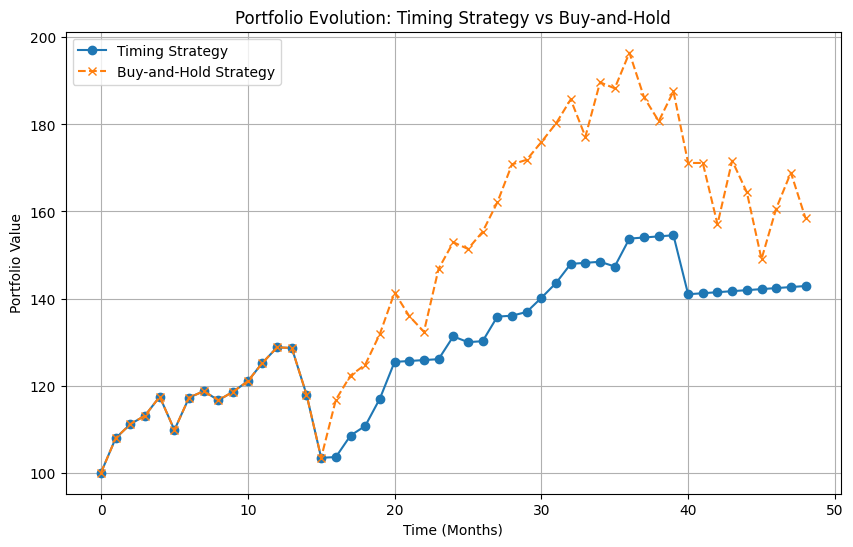

Cumulative Return: 42.88 %
Sharpe Ratio: 0.17
Maximum Drawdown: -19.7 %


In [41]:
portfolio_values, cumulative_return, sharpe_ratio, max_drawdown = timing_strategy_evaluation_with_drawdown(ols, x_test, y_test)

# Display results
print("Cumulative Return:", round(cumulative_return * 100, 2), "%")
print("Sharpe Ratio:", round(sharpe_ratio, 2))
print("Maximum Drawdown:", round(max_drawdown * 100, 2), "%")

### Timing Strategy for Ridge

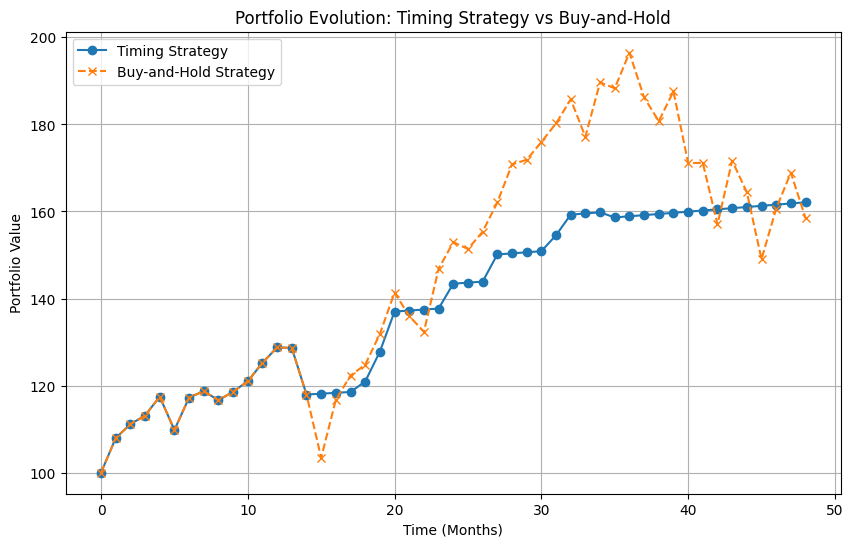

Cumulative Return: 62.1 %
Sharpe Ratio: 0.32
Maximum Drawdown: -8.42 %


In [42]:
portfolio_values, cumulative_return, sharpe_ratio, max_drawdown = timing_strategy_evaluation_with_drawdown(ridge, x_test, y_test)

# Display results
print("Cumulative Return:", round(cumulative_return * 100, 2), "%")
print("Sharpe Ratio:", round(sharpe_ratio, 2))
print("Maximum Drawdown:", round(max_drawdown * 100, 2), "%")

### Timing Strategy for Lasso


/var/folders/vw/trk5pzwn1qg69p8f6mv4gpf00000gn/T/ipykernel_22869/2760210611.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  sharpe_ratio_timing = (portfolio_values_timing.pct_change().mean() - risk_free_rate) / portfolio_values_timing.pct_change().std()


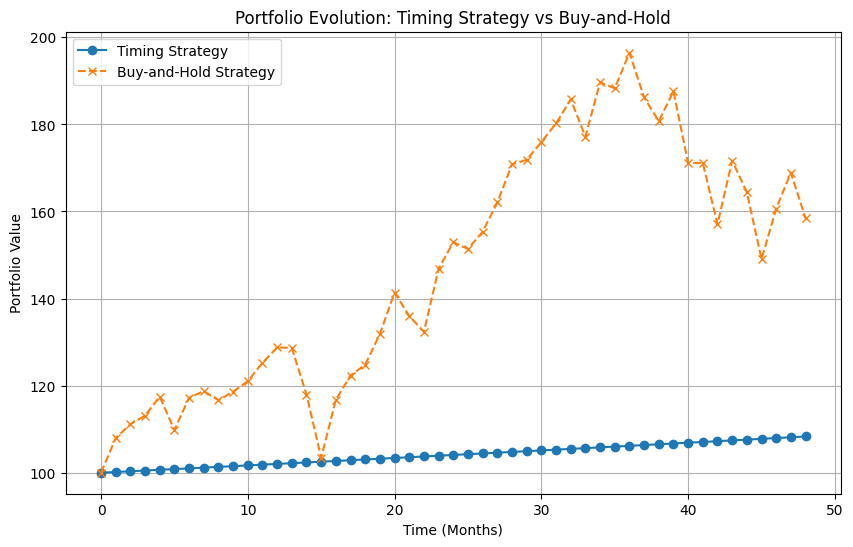

Cumulative Return: 8.32 %
Sharpe Ratio: inf
Maximum Drawdown: 0.0 %


In [43]:
portfolio_values, cumulative_return, sharpe_ratio, max_drawdown = timing_strategy_evaluation_with_drawdown(lasso, x_test, y_test)

# Display results
print("Cumulative Return:", round(cumulative_return * 100, 2), "%")
print("Sharpe Ratio:", round(sharpe_ratio, 2))
print("Maximum Drawdown:", round(max_drawdown * 100, 2), "%")

### Random Forest

#### insample Performance comparism 

In [44]:
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
print(f"Random Forest - Training MSE: {mse_train_rf:.4f}, Training R²: {r2_train_rf:.4f}")

Random Forest - Training MSE: 0.0017, Training R²: 0.4292


#### out-sample Performance comparism

In [45]:
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
print(f"Random Forest - Testing MSE: {mse_test_rf:.4f}, Testing R²: {r2_test_rf:.4f}")

Random Forest - Testing MSE: 0.0037, Testing R²: -0.2109


#### Timing Strategy for Random Forest


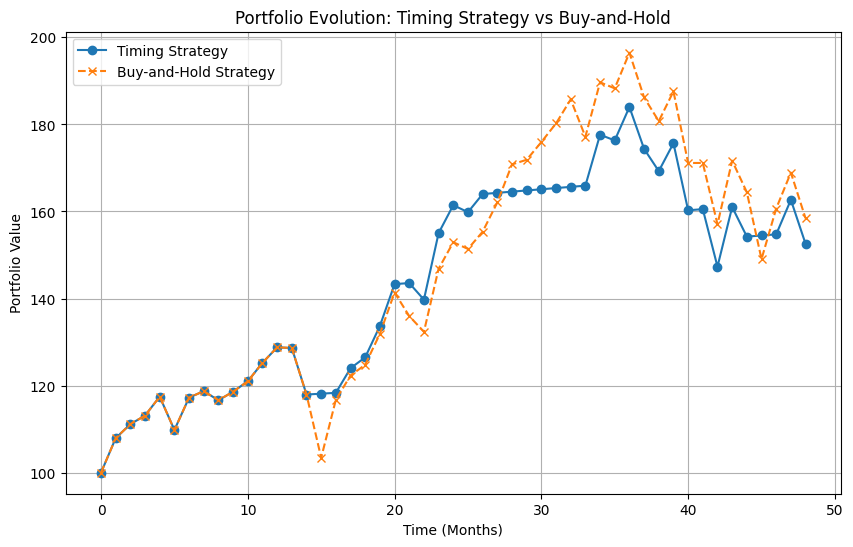

Cumulative Return: 52.57 %
Sharpe Ratio: 0.18
Maximum Drawdown: -19.93 %


In [46]:
portfolio_values, cumulative_return, sharpe_ratio, max_drawdown = timing_strategy_evaluation_with_drawdown(rf_random, x_test, y_test)

# Display results
print("Cumulative Return:", round(cumulative_return * 100, 2), "%")
print("Sharpe Ratio:", round(sharpe_ratio, 2))
print("Maximum Drawdown:", round(max_drawdown * 100, 2), "%")

## Visuals

### Plot for Linear Regression   


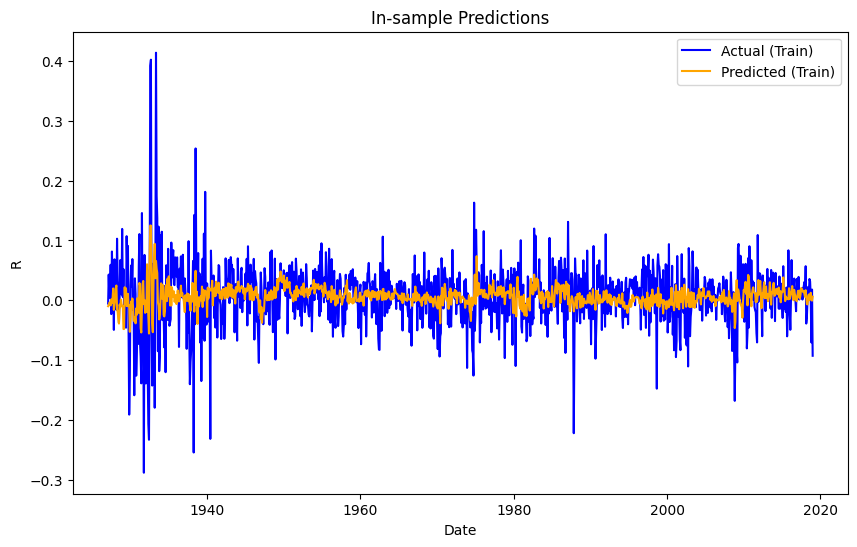

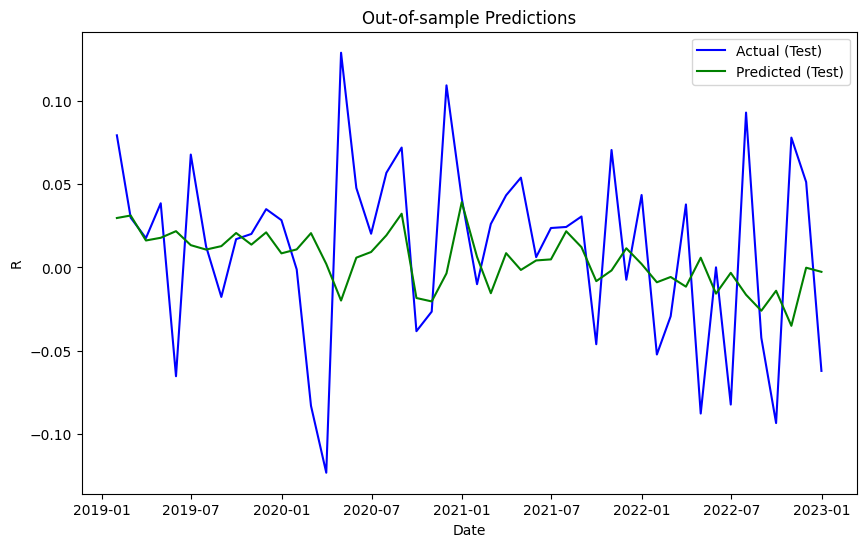

In [47]:
# In-sample Predictions
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label="Actual (Train)", color="blue")
plt.plot(y_train.index, y_insample_pred_ols, label="Predicted (Train)", color="orange")
plt.title("In-sample Predictions")
plt.xlabel("Date")
plt.ylabel("R")
plt.legend()
plt.show()

# Out-of-sample Predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual (Test)", color="blue")
plt.plot(y_test.index, y_outsample_pred_ols, label="Predicted (Test)", color="green")
plt.title("Out-of-sample Predictions")
plt.xlabel("Date")
plt.ylabel("R")
plt.legend()
plt.show()


### Plot for Random Forest


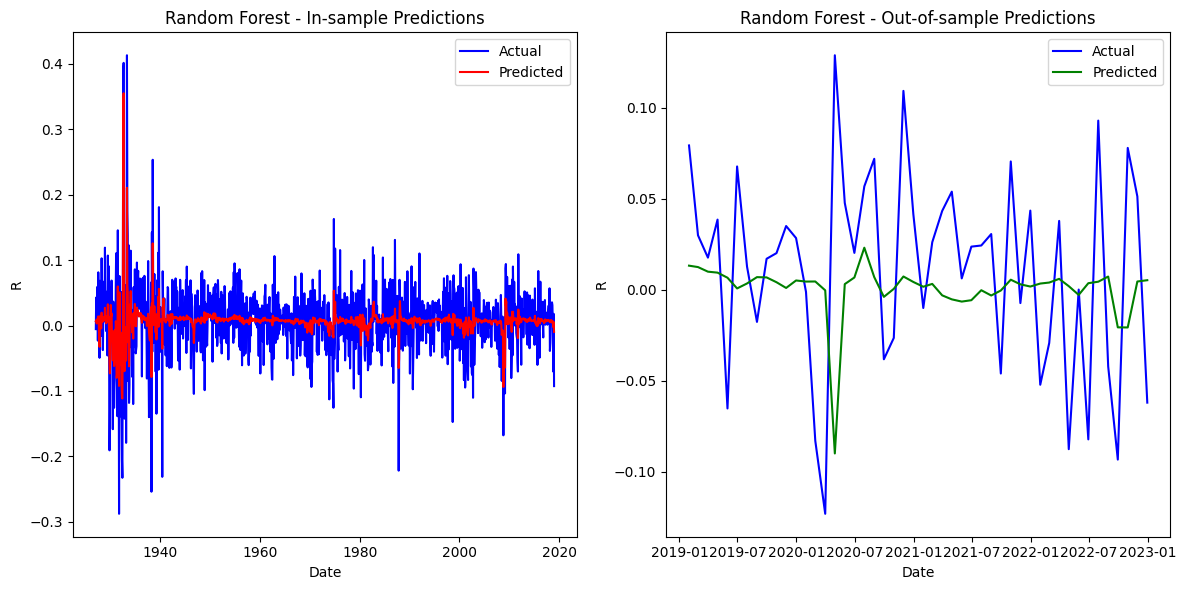

In [48]:
plt.figure(figsize=(12, 6))

# In-sample plot
plt.subplot(1, 2, 1)
plt.plot(y_train.index, y_train, label='Actual', color='blue')
plt.plot(y_train.index, y_train_pred_rf, label='Predicted', color='red')
plt.title('Random Forest - In-sample Predictions')
plt.xlabel('Date')
plt.ylabel('R')
plt.legend()

# Out-of-sample plot
plt.subplot(1, 2, 2)
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_test_pred_rf, label='Predicted', color='green')
plt.title('Random Forest - Out-of-sample Predictions')
plt.xlabel('Date')
plt.ylabel('R')
plt.legend()

plt.tight_layout()
plt.show()

# Financial Analysis

## Analysing data of Know Historical events

## Market Valuation Signal

### Dividend to Price Ratio vs. Book to Market Ratio
The Graph shows strong correlation between the book to market ratio and Divends to price ratio

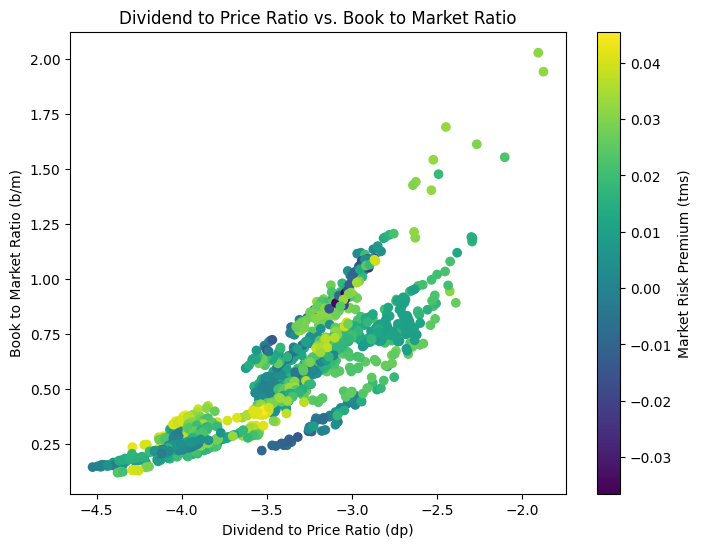

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(DF_FINAL['dp'], DF_FINAL['b/m'], c=DF_FINAL['tms'], cmap='viridis')
plt.xlabel('Dividend to Price Ratio (dp)')
plt.ylabel('Book to Market Ratio (b/m)')
plt.title('Dividend to Price Ratio vs. Book to Market Ratio')
_ = plt.colorbar(label='Market Risk Premium (tms)')

### Dividend price vs Dividend Yield
Dividend price vs Dividend Yield

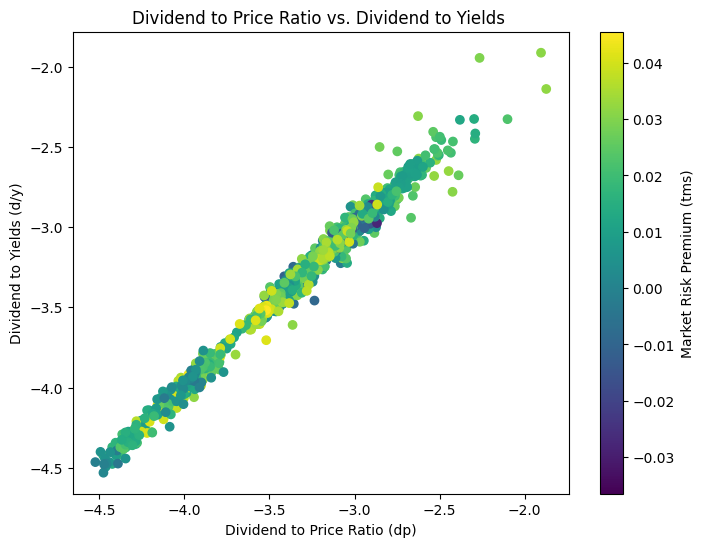

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(DF_FINAL['dp'], DF_FINAL['dy'], c=df['tms'], cmap='viridis')
plt.xlabel('Dividend to Price Ratio (dp)')
plt.ylabel('Dividend to Yields (d/y)')
plt.title('Dividend to Price Ratio vs. Dividend to Yields ')
_ = plt.colorbar(label='Market Risk Premium (tms)')

##  Spike Analysis 

[(Timestamp('1930-06-30 00:00:00'), Timestamp('1930-06-30 00:00:00')), (Timestamp('1930-07-31 00:00:00'), Timestamp('1930-07-31 00:00:00')), (Timestamp('1931-06-30 00:00:00'), Timestamp('1931-06-30 00:00:00')), (Timestamp('1931-09-30 00:00:00'), Timestamp('1931-09-30 00:00:00')), (Timestamp('1931-10-31 00:00:00'), Timestamp('1931-11-30 00:00:00')), (Timestamp('1931-12-31 00:00:00'), Timestamp('1932-02-29 00:00:00')), (Timestamp('1932-03-31 00:00:00'), Timestamp('1932-04-30 00:00:00')), (Timestamp('1932-05-31 00:00:00'), Timestamp('1932-06-30 00:00:00')), (Timestamp('1932-07-31 00:00:00'), Timestamp('1932-09-30 00:00:00')), (Timestamp('1932-10-31 00:00:00'), Timestamp('1932-11-30 00:00:00')), (Timestamp('1932-12-31 00:00:00'), Timestamp('1933-02-28 00:00:00')), (Timestamp('1933-03-31 00:00:00'), Timestamp('1933-04-30 00:00:00')), (Timestamp('1933-05-31 00:00:00'), Timestamp('1933-06-30 00:00:00')), (Timestamp('1933-07-31 00:00:00'), Timestamp('1933-09-30 00:00:00')), (Timestamp('1933-10

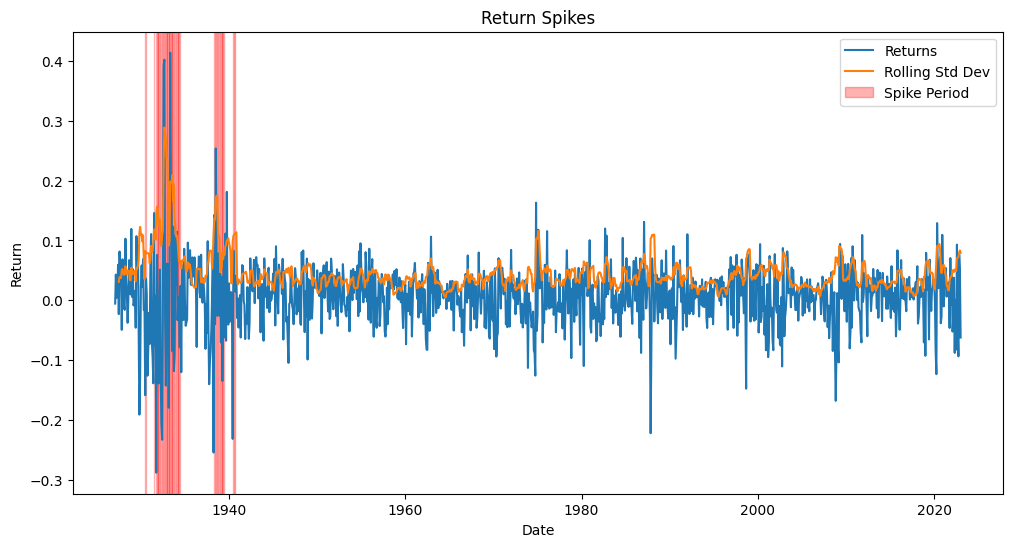

In [51]:
# Assuming 'R' column represents returns and the index is a datetime index.
def find_spike_periods(df, return_column='R', threshold=2):
    """
    Finds periods of spikes in returns exceeding a given threshold.

    Args:
        DF_FINAL: DataFrame with a datetime index and a return column.
        return_column: The name of the column containing returns.
        threshold: The standard deviation threshold to identify a spike.

    Returns:
        A list of tuples, where each tuple represents a spike period
        (start_date, end_date).
    """

    # Calculate rolling standard deviation to identify volatility
    rolling_std = DF_FINAL[return_column].rolling(window=12).std() # Adjust window size as needed

    # Identify spikes based on threshold
    spikes = DF_FINAL[return_column][rolling_std > threshold * rolling_std.mean()]

    # Group consecutive spikes into periods
    spike_periods = []
    start_date = None
    for date in spikes.index:
        if start_date is None:
            start_date = date
        elif date != spikes.index[spikes.index.get_loc(date) - 1] + pd.DateOffset(months=1): # Adjust for your data freq
            spike_periods.append((start_date, spikes.index[spikes.index.get_loc(date) - 1]))
            start_date = date
    if start_date is not None:
        spike_periods.append((start_date, spikes.index[-1]))

    return spike_periods

# Example usage:
spike_periods = find_spike_periods(DF_FINAL)
print(spike_periods)

# For visualization
plt.figure(figsize=(12, 6))
plt.plot(DF_FINAL['R'], label='Returns')
plt.plot(DF_FINAL['R'].rolling(window=6).std(), label='Rolling Std Dev')

for start, end in spike_periods:
    plt.axvspan(start, end, color='red', alpha=0.3, label='Spike Period' if start==spike_periods[0][0] else '') # Plot each spike as a shaded area
plt.legend()
plt.title('Return Spikes')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()